In [2]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=p.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [14]:
for col in df.columns:
    print(f'{col} : {df[col].unique()}')

Age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingBP : [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 2

In [15]:
df.replace({'M':1,'F':0},inplace=True)
df.replace({'ATA':1 ,'NAP':2 ,'ASY':3 ,'TA':4},inplace=True)
df.replace({'Normal':1, 'ST':2 ,'LVH':3},inplace=True)
df.replace({'N':0 ,'Y':1},inplace=True)
df.replace({'Up':1 ,'Flat':2 ,'Down':3},inplace=True)

In [16]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

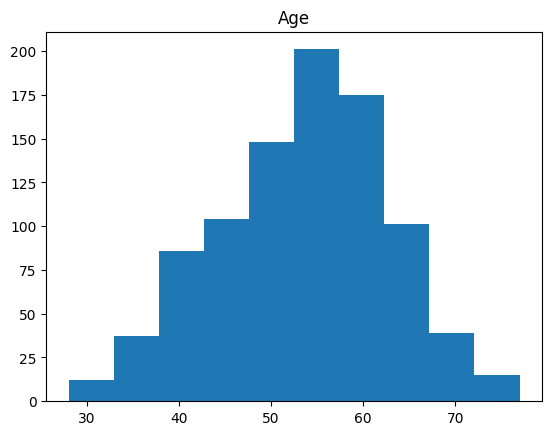

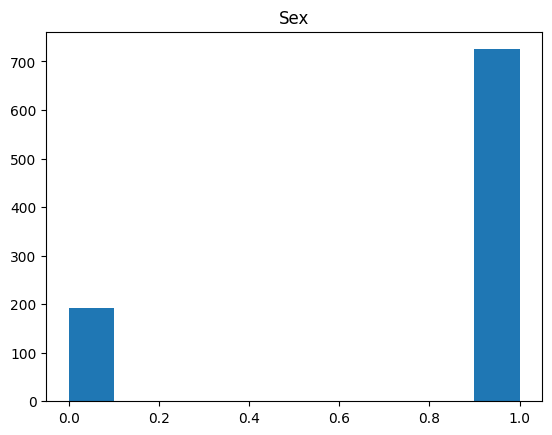

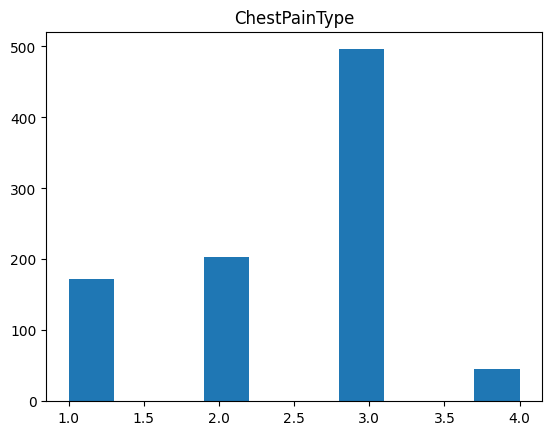

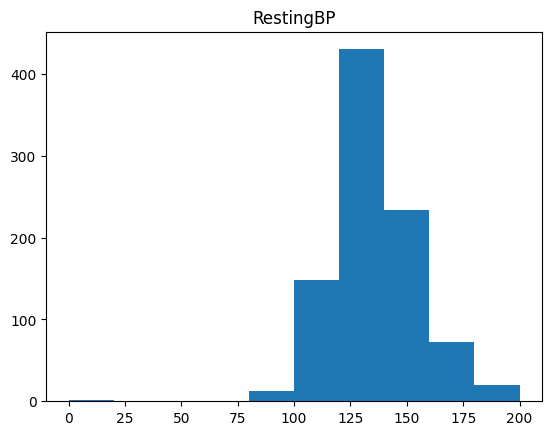

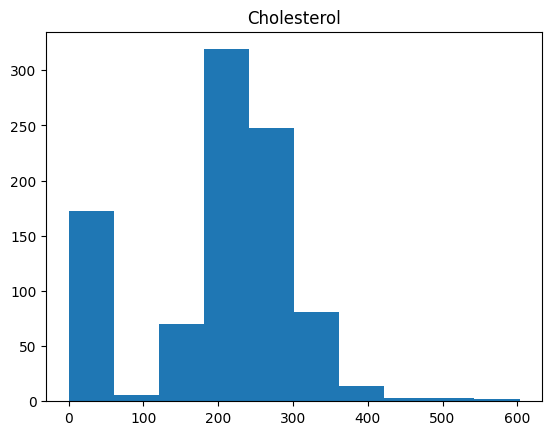

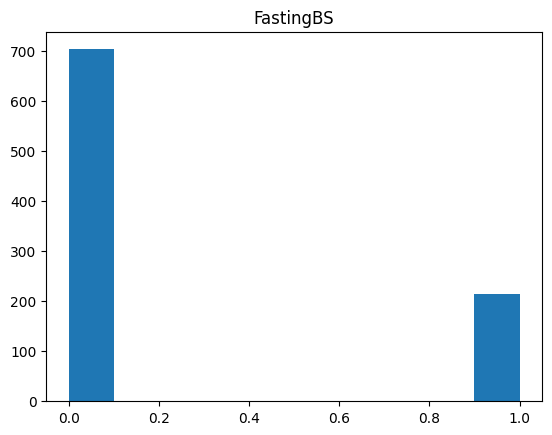

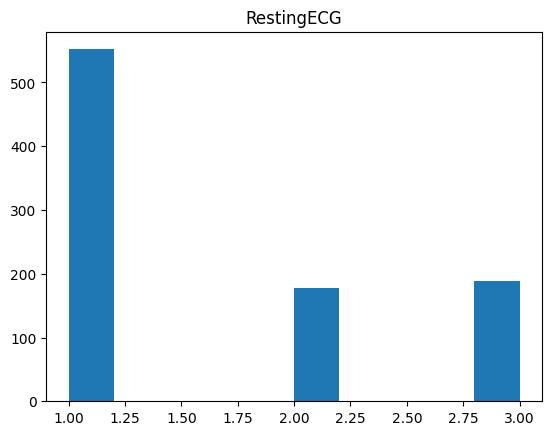

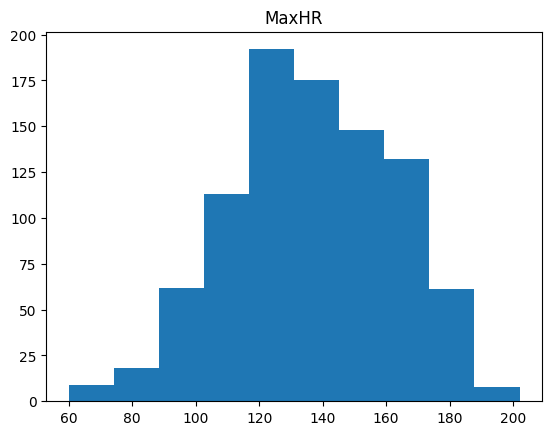

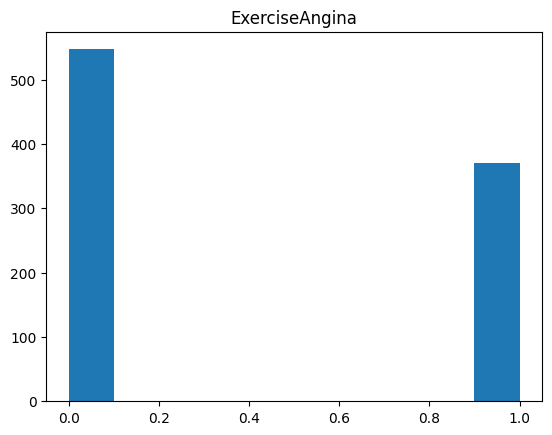

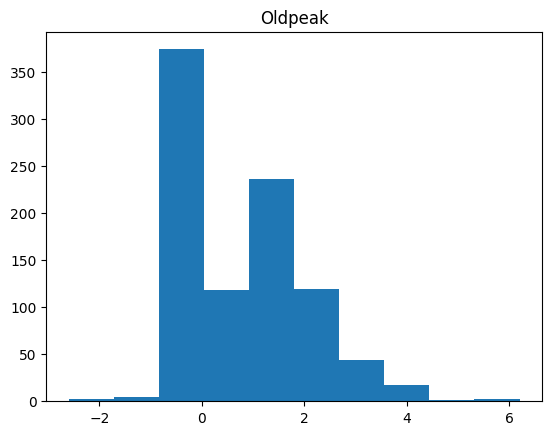

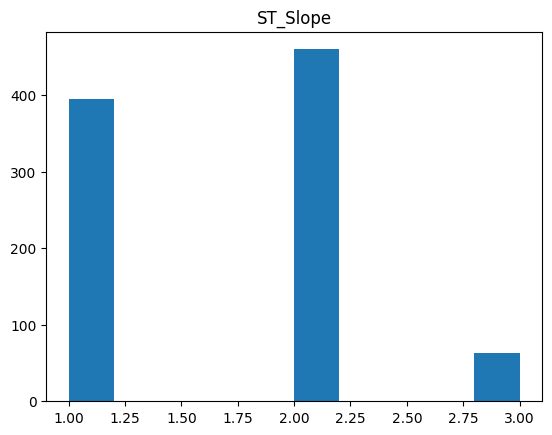

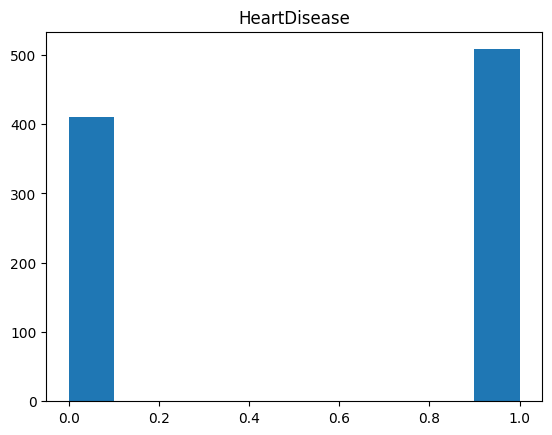

In [17]:
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [18]:
x=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [20]:
xtrain.shape

(734, 11)

In [21]:
xtest.shape

(184, 11)

In [22]:
def m(alg):
    model=alg
    model.fit(xtrain,ytrain)
    return model.score(xtest,ytest)

In [65]:
m(RandomForestClassifier(n_estimators=150)),m(DecisionTreeClassifier()),m(LinearRegression()),m(LogisticRegression())

C:\Users\VENKTESH DALAVAYI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8641304347826086,
 0.7663043478260869,
 0.5050124864159184,
 0.8586956521739131)

In [58]:
m(SVC(C=10,gamma=0.0001,kernel='linear'))

0.8695652173913043

In [90]:
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(512,activation='relu',input_shape=(11,)),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1,activation='sigmoid')
])

In [91]:
model.compile(
optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

In [99]:
model.fit(xtrain,ytrain,epochs=100,shuffle=True)

Epoch 1/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4424 - accuracy: 0.8202
Epoch 2/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4538 - accuracy: 0.8147
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4422 - accuracy: 0.8161
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3966 - accuracy: 0.8460
Epoch 5/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3992 - accuracy: 0.8488
Epoch 6/100
23/23 [==============================] - 0s 11ms/step - loss: 0.4261 - accuracy: 0.8134
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3802 - accuracy: 0.8460
Epoch 8/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4087 - accuracy: 0.8297
Epoch 9/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4061 - accuracy: 0.8215
Epoch 10/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4316 - accuracy: 0.8256
Epoch 11

Epoch 83/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3514 - accuracy: 0.8583
Epoch 84/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3410 - accuracy: 0.8733
Epoch 85/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3581 - accuracy: 0.8651
Epoch 86/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3531 - accuracy: 0.8542
Epoch 87/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3506 - accuracy: 0.8665
Epoch 88/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3448 - accuracy: 0.8542
Epoch 89/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3530 - accuracy: 0.8460
Epoch 90/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3328 - accuracy: 0.8474
Epoch 91/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3297 - accuracy: 0.8678
Epoch 92/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3440 - accuracy: 0.8569


In [97]:
model.evaluate(xtest,ytest)

6/6 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.8587


[0.46749740839004517, 0.8586956262588501]

In [105]:
m1=RandomForestClassifier(n_estimators=100)


In [106]:
m1.fit(xtrain,ytrain)
m1.score(xtest,ytest)

0.875

<BarContainer object of 5 artists>

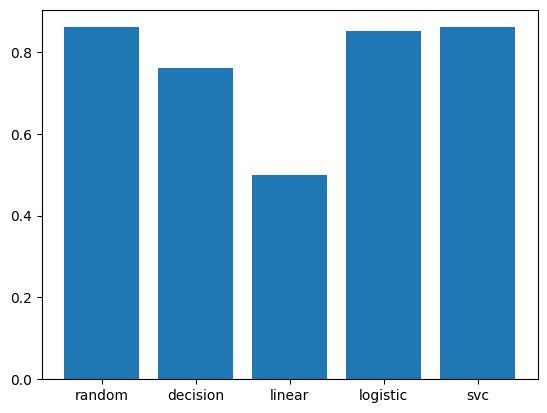

In [108]:
x=[0.86,
 0.76,
 0.50,
 0.85,
  0.86]
y=['random','decision','linear','logistic','svc']
plt.bar(y,x)

In [ ]:
import pickle as p
p.dump()